<a href="https://colab.research.google.com/github/Sabastain-Wakoyi/Wakoyi-Tolulope/blob/main/Tolulope_Wakoyi_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Download the LFW dataset  from UMASS
!wget http://vis-www.cs.umass.edu/lfw/lfw.tgz

#create the 'data' directory if it foesn't exist and extract lfw into it
!mkdir -p data
!tar -xvzf lfw.tgz -C data/
#This gives a datatset path as data/lfw

Streaming output truncated to the last 5000 lines.
lfw/Luis_Sanchez/
lfw/Luis_Sanchez/Luis_Sanchez_0001.jpg
lfw/Juliette_Binoche/
lfw/Juliette_Binoche/Juliette_Binoche_0001.jpg
lfw/Joel_Todd/
lfw/Joel_Todd/Joel_Todd_0001.jpg
lfw/Allan_Wagner/
lfw/Allan_Wagner/Allan_Wagner_0001.jpg
lfw/Alejandro_Fernandez/
lfw/Alejandro_Fernandez/Alejandro_Fernandez_0001.jpg
lfw/Guillaume_Depardieu/
lfw/Guillaume_Depardieu/Guillaume_Depardieu_0001.jpg
lfw/Delphine_Chuillot/
lfw/Delphine_Chuillot/Delphine_Chuillot_0001.jpg
lfw/Paul_LeClerc/
lfw/Paul_LeClerc/Paul_LeClerc_0001.jpg
lfw/Eddie_Jordan/
lfw/Eddie_Jordan/Eddie_Jordan_0001.jpg
lfw/Lionel_Richie/
lfw/Lionel_Richie/Lionel_Richie_0001.jpg
lfw/Lionel_Richie/Lionel_Richie_0002.jpg
lfw/Jose_Viegas_Filho/
lfw/Jose_Viegas_Filho/Jose_Viegas_Filho_0001.jpg
lfw/Jose_Viegas_Filho/Jose_Viegas_Filho_0002.jpg
lfw/Roger_Mahony/
lfw/Roger_Mahony/Roger_Mahony_0001.jpg
lfw/Clay_Aiken/
lfw/Clay_Aiken/Clay_Aiken_0001.jpg
lfw/Clay_Aiken/Clay_Aiken_0002.jpg
lfw/Clay_Ai

In [ ]:
!ls data/lfw

Aaron_Eckhart			 Joshua_Harapko
Aaron_Guiel			 Joshua_Perper
Aaron_Patterson			 Joxel_Garcia
Aaron_Peirsol			 Joy_Bryant
Aaron_Pena			 Joy_Lee_Sadler
Aaron_Sorkin			 JP_Suarez
Aaron_Tippin			 JT_Snow
Abba_Eban			 Juan_Antonio_Samaranch
Abbas_Kiarostami		 Juan_Carlos
Abdel_Aziz_Al-Hakim		 Juan_Carlos_Ferrero
Abdel_Madi_Shabneh		 Juan_Carlos_Morales
Abdel_Nasser_Assidi		 Juan_Carlos_Ortega
Abdoulaye_Wade			 Juanes
Abdulaziz_Kamilov		 Juan_Fernandez
Abdullah			 Juan_Francisco_Palencia
Abdullah_Ahmad_Badawi		 Juan_Ignacio_Chela
Abdullah_al-Attiyah		 Juan_Jose_Lucas
Abdullah_Gul			 Juan_Manuel_Marquez
Abdullah_Nasseef		 Juan_Pablo_Montoya
Abdullatif_Sener		 Juan_Roman_Carrasco
Abdul_Majeed_Shobokshi		 Juan_Roman_Riquelme
Abdul_Rahman			 Juan_Sanchez
Abel_Aguilar			 Juan_Valencia_Osorio
Abel_Pacheco			 Judd_Davies
Abid_Hamid_Mahmud_Al-Tikriti	 Jude_Law
Abner_Martinez			 Judi_Dench
Abraham_Foxman			 Judi_Patton
Aby_Har-Even			 Judith_Nathan
Adam_Ant			 Judy_Dean
Adam_Freier			 Judy_Genshaft
A

In [ ]:
import cv2
import os
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#initialize Haar cascade for the detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

#path to LFW dataset
lfw_dir = 'data/lfw'

#prepare lists to store results for evaluation
y_true = []
y_pred = []


#Function to evaluate face detection for each image
def detect_faces_viola_jones(img_path):
      #Read faces in grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    #detect faces
    faces = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    #return true if faces detected, otherwise False
    return len(faces) > 0

#loop over each person folder in lfw dataset
for person in os.listdir(lfw_dir):
  person_dir = os.path.join(lfw_dir, person)

  #loop over each image for the person
  for image_name in os.listdir(person_dir):
    image_path = os.path.join(person_dir, image_name)

    #run face detection
    face_detected = detect_faces_viola_jones(image_path)

    #Append ground truth and  prediction (1 if face is present, 0 otherwise)
    y_true.append(1)
    y_pred.append(1 if face_detected else 0)


#calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)


print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")



Accuracy: 0.99
Precision: 1.0
Recall: 0.99
F1 Score: 1.00


In [ ]:
import os
import random
import cv2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize Viola-Jones face detector with Haar cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Path to LFW dataset
lfw_dir = 'data/lfw'

# List all images in the dataset
all_images = []
for person in os.listdir(lfw_dir):
    person_dir = os.path.join(lfw_dir, person)
    for image_name in os.listdir(person_dir):
        all_images.append(os.path.join(person_dir, image_name))

# Shuffle and split into 80% train and 20% test sets
random.shuffle(all_images)
split_idx = int(0.8 * len(all_images))
train_images = all_images[:split_idx]
test_images = all_images[split_idx:]

# Define face detection function for Viola-Jones
def detect_faces_viola_jones(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    faces = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    return len(faces) > 0  # Return True if faces detected, else False

# Define evaluation function
def evaluate_model(image_list):
    y_true = []
    y_pred = []

    for image_path in image_list:
        face_detected = detect_faces_viola_jones(image_path)
        y_true.append(1)  # All LFW images contain faces, so ground truth is always 1
        y_pred.append(1 if face_detected else 0)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return accuracy, precision, recall, f1

# Evaluate on train set
train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(train_images)
print(f"Train Set - Accuracy: {train_accuracy:.2f}, Precision: {train_precision:.2f}, Recall: {train_recall:.2f}, F1 Score: {train_f1:.2f}")

# Evaluate on test set
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(test_images)
print(f"Test Set - Accuracy: {test_accuracy:.2f}, Precision: {test_precision:.2f}, Recall: {test_recall:.2f}, F1 Score: {test_f1:.2f}")


Train Set - Accuracy: 0.99, Precision: 1.00, Recall: 0.99, F1 Score: 1.00
Test Set - Accuracy: 0.99, Precision: 1.00, Recall: 0.99, F1 Score: 1.00


In [ ]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.5 MB/s eta 0:00:00


In [ ]:
from mtcnn import MTCNN
import cv2
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Initialize MTCNN face detector
detector = MTCNN()

# Path to LFW dataset
lfw_dir = 'data/lfw'

# Prepare lists to store results for evaluation
y_true = []
y_pred = []

# Function to evaluate face detection for each image
def detect_faces_mtcnn(image_path):
    # Read image in RGB format (MTCNN requires RGB)
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Detect faces using MTCNN
    faces = detector.detect_faces(img_rgb)

    # Return True if faces detected, False otherwise
    return len(faces) > 0

# Loop over each person folder in LFW dataset
for person in os.listdir(lfw_dir):
    person_dir = os.path.join(lfw_dir, person)

    # Loop over each image for the person
    for image_name in os.listdir(person_dir):
        image_path = os.path.join(person_dir, image_name)

        # Run face detection
        face_detected = detect_faces_mtcnn(image_path)

        # Append ground truth and prediction (1 if face is present, 0 otherwise)
        y_true.append(1)  # Since all LFW images contain faces, ground truth is always 1
        y_pred.append(1 if face_detected else 0)

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [ ]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.8 MB/s eta 0:00:00


In [ ]:
!pip install lz4

In [ ]:
!pip install --upgrade joblib


In [ ]:
!pip uninstall mtcnn -y
!pip install mtcnn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.1 MB/s eta 0:00:00


In [ ]:
import os
import random
from mtcnn import MTCNN
import cv2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Initialize MTCNN face detector
detector = MTCNN()

# Path to LFW dataset
lfw_dir = 'data/lfw'

# List all images in the dataset
all_images = []
for person in os.listdir(lfw_dir):
    person_dir = os.path.join(lfw_dir, person)
    for image_name in os.listdir(person_dir):
        all_images.append(os.path.join(person_dir, image_name))

# Shuffle and split into 80% train and 20% test sets
random.shuffle(all_images)
split_idx = int(0.8 * len(all_images))
train_images = all_images[:split_idx]
test_images = all_images[split_idx:]

# Prepare function for face detection and metric calculation
def detect_faces_mtcnn(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img_rgb)
    return len(faces) > 0

def evaluate_model(image_list):
    y_true = []
    y_pred = []

    for image_path in image_list:
        face_detected = detect_faces_mtcnn(image_path)
        y_true.append(1)  # All LFW images have faces, so y_true is always 1
        y_pred.append(1 if face_detected else 0)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return accuracy, precision, recall, f1

# Evaluate on train set
train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(train_images)
print(f"Train Set - Accuracy: {train_accuracy:.2f}, Precision: {train_precision:.2f}, Recall: {train_recall:.2f}, F1 Score: {train_f1:.2f}")

# Evaluate on test set
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(test_images)
print(f"Test Set - Accuracy: {test_accuracy:.2f}, Precision: {test_precision:.2f}, Recall: {test_recall:.2f}, F1 Score: {test_f1:.2f}")


Train Set - Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1 Score: 1.00
Test Set - Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1 Score: 1.00


In [ ]:
#downloading the LFW dataset from UMASS
!wget http://vis-www.cs.umass.edu/lfw/lfw.tgz

#created a data directory and extracted lfw into it
!mkdir -p data
!tar -xvzf lfw.tgz -C data


Streaming output truncated to the last 5000 lines.
lfw/Luis_Sanchez/
lfw/Luis_Sanchez/Luis_Sanchez_0001.jpg
lfw/Juliette_Binoche/
lfw/Juliette_Binoche/Juliette_Binoche_0001.jpg
lfw/Joel_Todd/
lfw/Joel_Todd/Joel_Todd_0001.jpg
lfw/Allan_Wagner/
lfw/Allan_Wagner/Allan_Wagner_0001.jpg
lfw/Alejandro_Fernandez/
lfw/Alejandro_Fernandez/Alejandro_Fernandez_0001.jpg
lfw/Guillaume_Depardieu/
lfw/Guillaume_Depardieu/Guillaume_Depardieu_0001.jpg
lfw/Delphine_Chuillot/
lfw/Delphine_Chuillot/Delphine_Chuillot_0001.jpg
lfw/Paul_LeClerc/
lfw/Paul_LeClerc/Paul_LeClerc_0001.jpg
lfw/Eddie_Jordan/
lfw/Eddie_Jordan/Eddie_Jordan_0001.jpg
lfw/Lionel_Richie/
lfw/Lionel_Richie/Lionel_Richie_0001.jpg
lfw/Lionel_Richie/Lionel_Richie_0002.jpg
lfw/Jose_Viegas_Filho/
lfw/Jose_Viegas_Filho/Jose_Viegas_Filho_0001.jpg
lfw/Jose_Viegas_Filho/Jose_Viegas_Filho_0002.jpg
lfw/Roger_Mahony/
lfw/Roger_Mahony/Roger_Mahony_0001.jpg
lfw/Clay_Aiken/
lfw/Clay_Aiken/Clay_Aiken_0001.jpg
lfw/Clay_Aiken/Clay_Aiken_0002.jpg
lfw/Clay_Ai

Displaying  10 images:


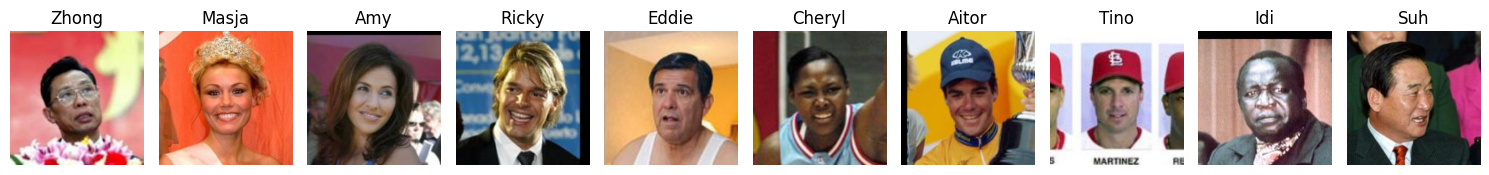

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path to the extracted LFW dataset
lfw_dir = "data/lfw"

# List all subdirectories (person names)
persons = os.listdir(lfw_dir)


# Display the first 10 images
print("Displaying  10 images:")
fig, axes = plt.subplots(1, 10, figsize=(15, 5))
for i, person in enumerate(persons[:10]):
    person_dir = os.path.join(lfw_dir, person)
    first_image_path = os.path.join(person_dir, os.listdir(person_dir)[0])
    img = Image.open(first_image_path)
    axes[i].imshow(img)
    axes[i].set_title(person.split("_")[0])
    axes[i].axis("off")
plt.tight_layout()
plt.show()

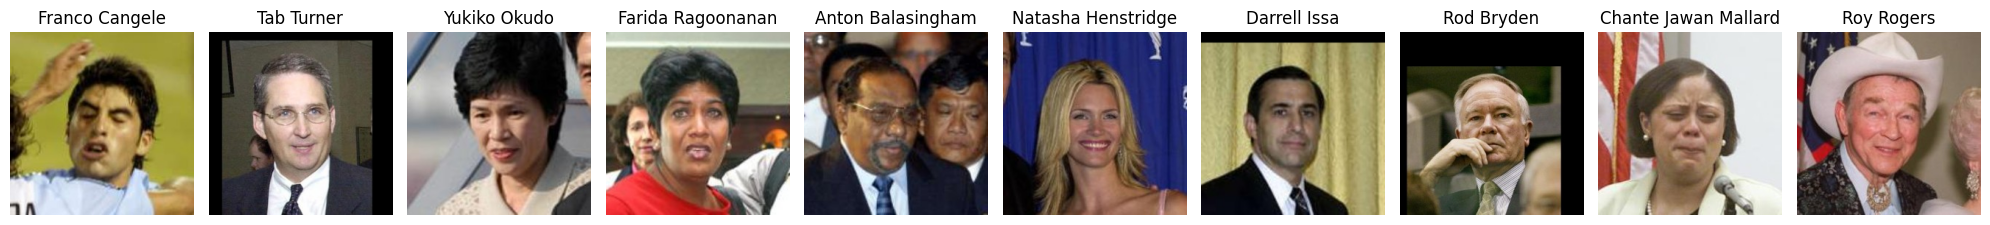

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Path to the extracted LFW dataset
lfw_dir = "data/lfw"

# List all subdirectories (person names)
if os.path.exists(lfw_dir):
    persons = os.listdir(lfw_dir)
    persons.sort()  # Sort alphabetically for consistent display

    # Randomly select 10 persons
    selected_persons = random.sample(persons, 10)

    # Display images of the selected 10 persons
    fig, axes = plt.subplots(1, 10, figsize=(20, 5))
    for i, person in enumerate(selected_persons):
        person_dir = os.path.join(lfw_dir, person)
        first_image_path = os.path.join(person_dir, os.listdir(person_dir)[0])
        img = Image.open(first_image_path)
        axes[i].imshow(img)
        axes[i].set_title(person.replace("_", " "))  # Display full name
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()
else:
    print("The LFW dataset directory does not exist. Please download and extract it.")
